# Context:
The data set has information about features of silhouette extracted from the images of different cars
Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 
cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars 
would be readily distinguishable, but it would be more difficult to distinguish between the cars.

Here let's apply Hierarchial Clustering

### Import libraries and Read the dataset using function .dropna() - to avoid dealing with NAs

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('vehicle.csv').dropna()

In [3]:
df.shape

(813, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  813 non-null    int64  
 1   circularity                  813 non-null    float64
 2   distance_circularity         813 non-null    float64
 3   radius_ratio                 813 non-null    float64
 4   pr.axis_aspect_ratio         813 non-null    float64
 5   max.length_aspect_ratio      813 non-null    int64  
 6   scatter_ratio                813 non-null    float64
 7   elongatedness                813 non-null    float64
 8   pr.axis_rectangularity       813 non-null    float64
 9   max.length_rectangularity    813 non-null    int64  
 10  scaled_variance              813 non-null    float64
 11  scaled_variance.1            813 non-null    float64
 12  scaled_radius_of_gyration    813 non-null    float64
 13  scaled_radius_of_gyr

In [5]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


### Print/ Plot the dependent (categorical variable) and Check for any missing values in the data

In [6]:
#Since the variable is categorical, you can use value_counts function
pd.value_counts(df['class'])

car    413
bus    205
van    195
Name: class, dtype: int64

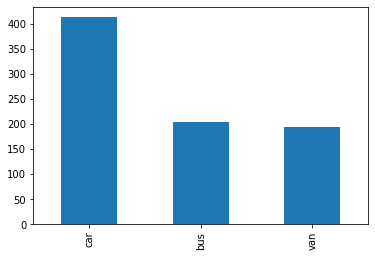

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.value_counts(df["class"]).plot(kind="bar")

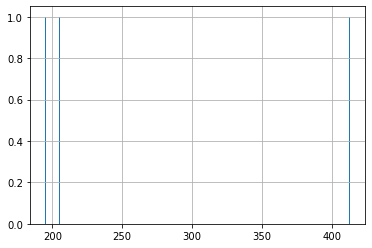

In [8]:
pd.value_counts(df['class']).hist(bins=300)

In [9]:
df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### KDE plot for all the features to see how many of it can show separate clusters.

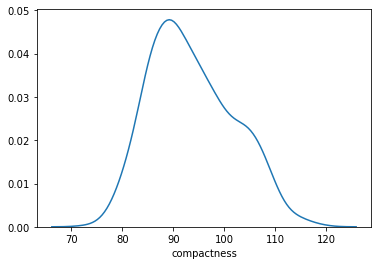

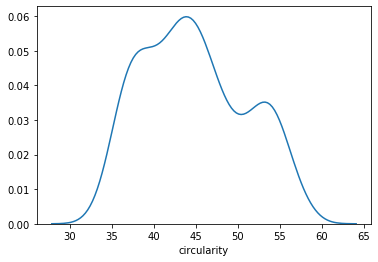

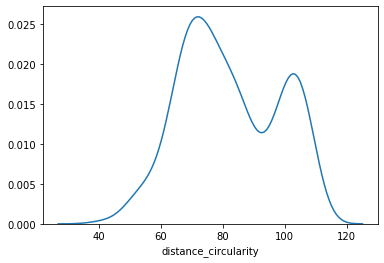

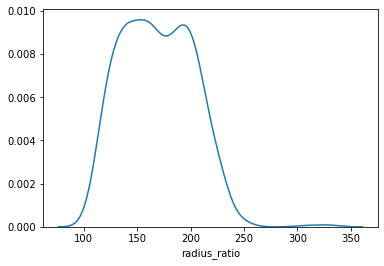

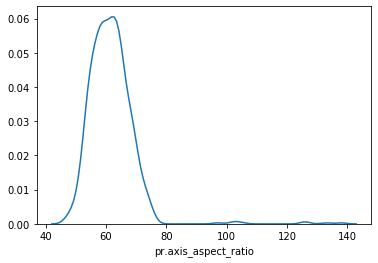

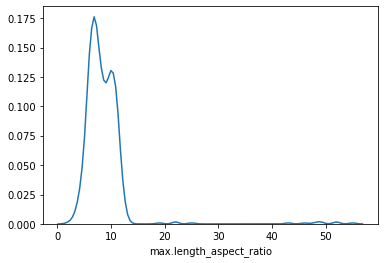

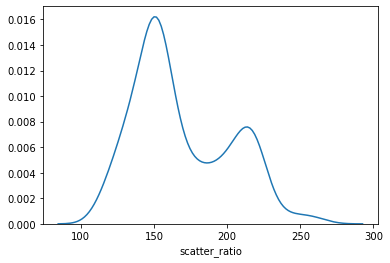

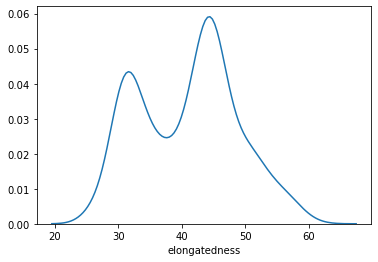

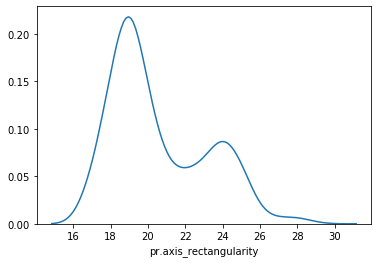

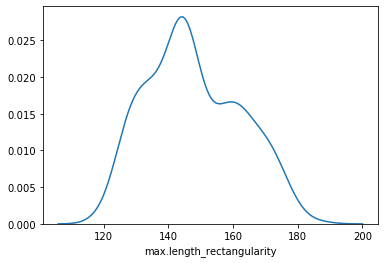

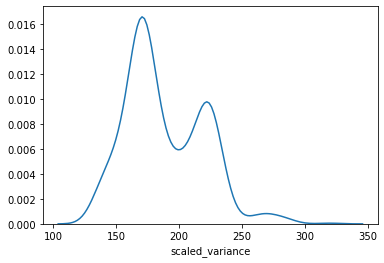

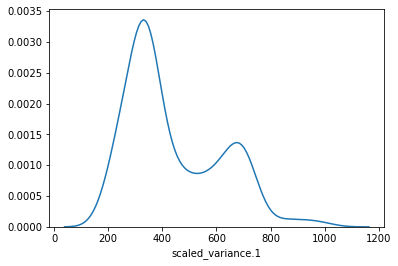

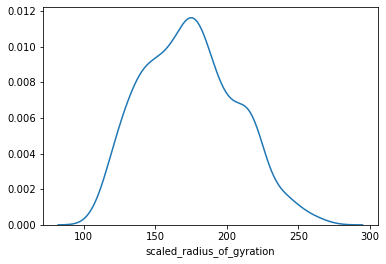

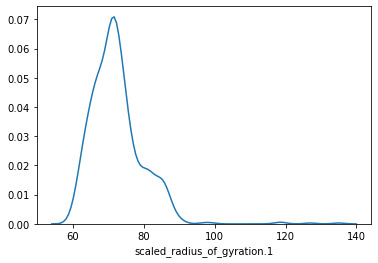

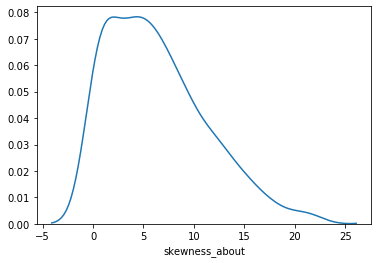

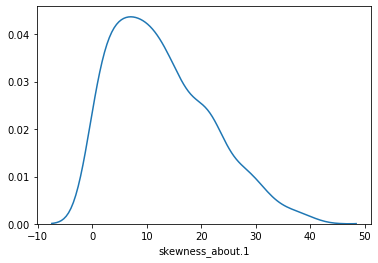

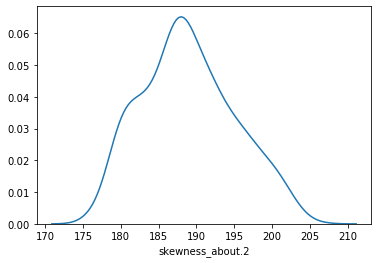

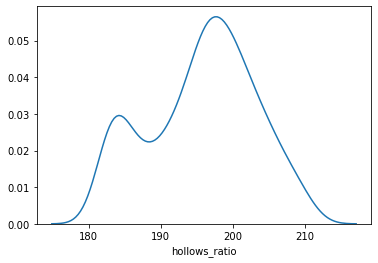

In [10]:
import seaborn as sns

for i in df.columns[df.columns!='class']:
    sns.distplot(df[i],hist=False,)
    plt.show()

### Standardize the data

In [11]:
# Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we 
#go for any clustering methods. You can use zscore function to do this

In [12]:
interest_df = df.drop('class', axis=1)

In [13]:
from scipy.stats import zscore
interest_df_z = interest_df.apply(zscore)

In [14]:
interest_df_z.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


In [15]:
from sklearn.preprocessing import StandardScaler
import numpy as np
sc = StandardScaler()
X_std = pd.DataFrame(sc.fit_transform(interest_df),columns=interest_df.columns)

In [16]:
X_std.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


### Find out the linkage matrix

In [17]:
#Use ward as linkage metric and distance as Eucledian

In [18]:
#### generate the linkage matrix
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X_std, 'ward', metric='euclidean')
Z.shape

(812, 4)

In [19]:
Z[:]

array([[1.27000000e+02, 3.70000000e+02, 1.31740844e-01, 2.00000000e+00],
       [4.78000000e+02, 7.52000000e+02, 3.94147914e-01, 2.00000000e+00],
       [4.48000000e+02, 5.25000000e+02, 5.40896298e-01, 2.00000000e+00],
       ...,
       [1.60100000e+03, 1.62100000e+03, 5.12738877e+01, 2.82000000e+02],
       [1.61700000e+03, 1.62000000e+03, 5.35328071e+01, 5.31000000e+02],
       [1.62200000e+03, 1.62300000e+03, 1.07910132e+02, 8.13000000e+02]])

### Plot the dendrogram for the consolidated dataframe

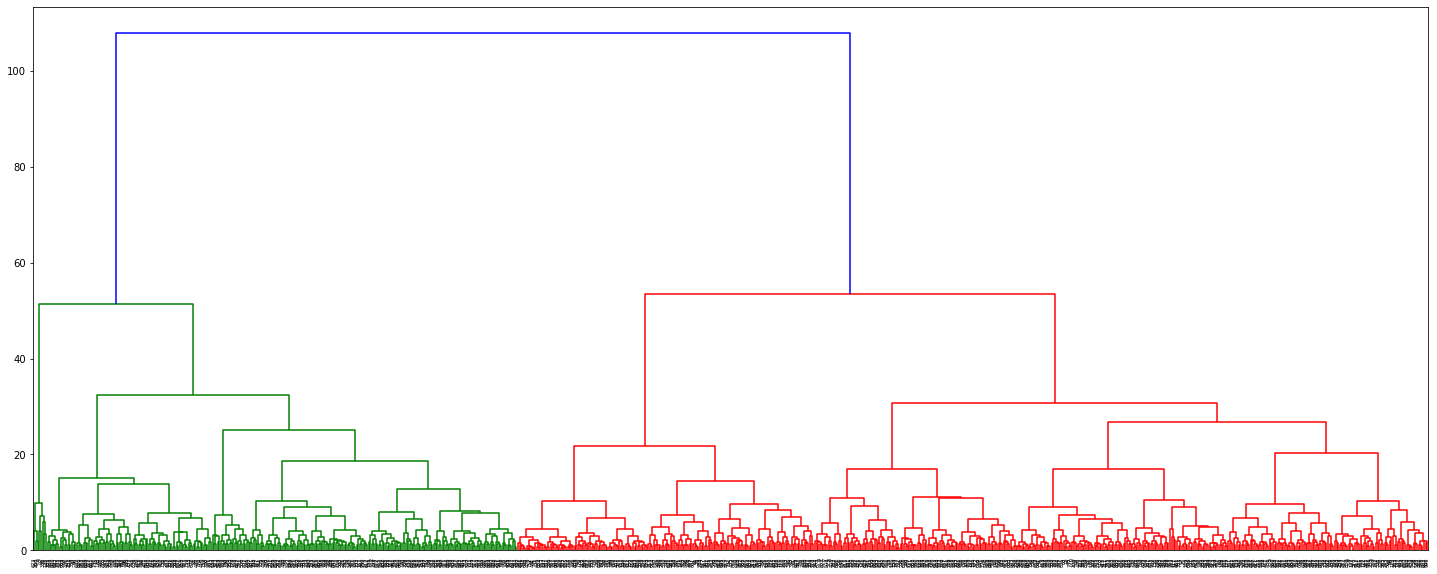

In [20]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

Recreate the dendrogram for last 12 merged clusters

### From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

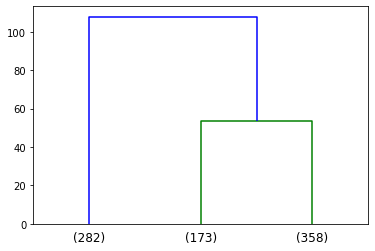

In [21]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [22]:
max_d = 52

### Use this distance measure(max_d) and fcluster function to cluster the data into 3 different groups

In [23]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 1, 3, 2, 3, 3, 1,
       3, 2, 1, 1, 2, 3, 3, 3, 1, 3, 2, 1, 1, 2, 1, 2, 3, 3, 1, 3, 3, 2,
       3, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 3, 1, 1,
       3, 2, 3, 1, 3, 2, 3, 1, 3, 2, 3, 1, 3, 2, 1, 2, 1, 3, 1, 3, 2, 1,
       2, 2, 1, 2, 1, 3, 3, 3, 1, 1, 3, 2, 1, 3, 3, 2, 2, 3, 3, 1, 1, 3,
       2, 3, 3, 3, 3, 3, 2, 3, 3, 1, 1, 3, 3, 2, 1, 1, 3, 3, 2, 3, 3, 1,
       2, 3, 1, 3, 3, 3, 3, 1, 1, 3, 1, 3, 1, 3, 3, 3, 2, 1, 3, 3, 1, 1,
       3, 1, 2, 2, 1, 1, 3, 1, 3, 3, 3, 3, 2, 1, 2, 3, 2, 1, 1, 3, 3, 1,
       3, 3, 3, 1, 3, 2, 1, 2, 2, 2, 3, 3, 1, 1, 3, 3, 3, 2, 1, 3, 3, 3,
       1, 3, 2, 1, 3, 3, 1, 3, 2, 2, 3, 1, 3, 1, 2, 2, 2, 2, 1, 3, 3, 3,
       1, 2, 3, 3, 2, 1, 3, 2, 3, 3, 1, 2, 1, 3, 3, 3, 1, 3, 3, 1, 1, 2,
       3, 3, 3, 1, 2, 3, 3, 2, 2, 1, 3, 1, 3, 2, 2, 1, 3, 1, 2, 2, 1, 3,
       3, 1, 2, 3, 1, 3, 3, 1, 3, 1, 2, 3, 3, 1, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 3, 1, 2, 2, 3, 1, 2, 1, 1, 2, 1, 3, 2,

### Final dendogram with 'ward linkage'

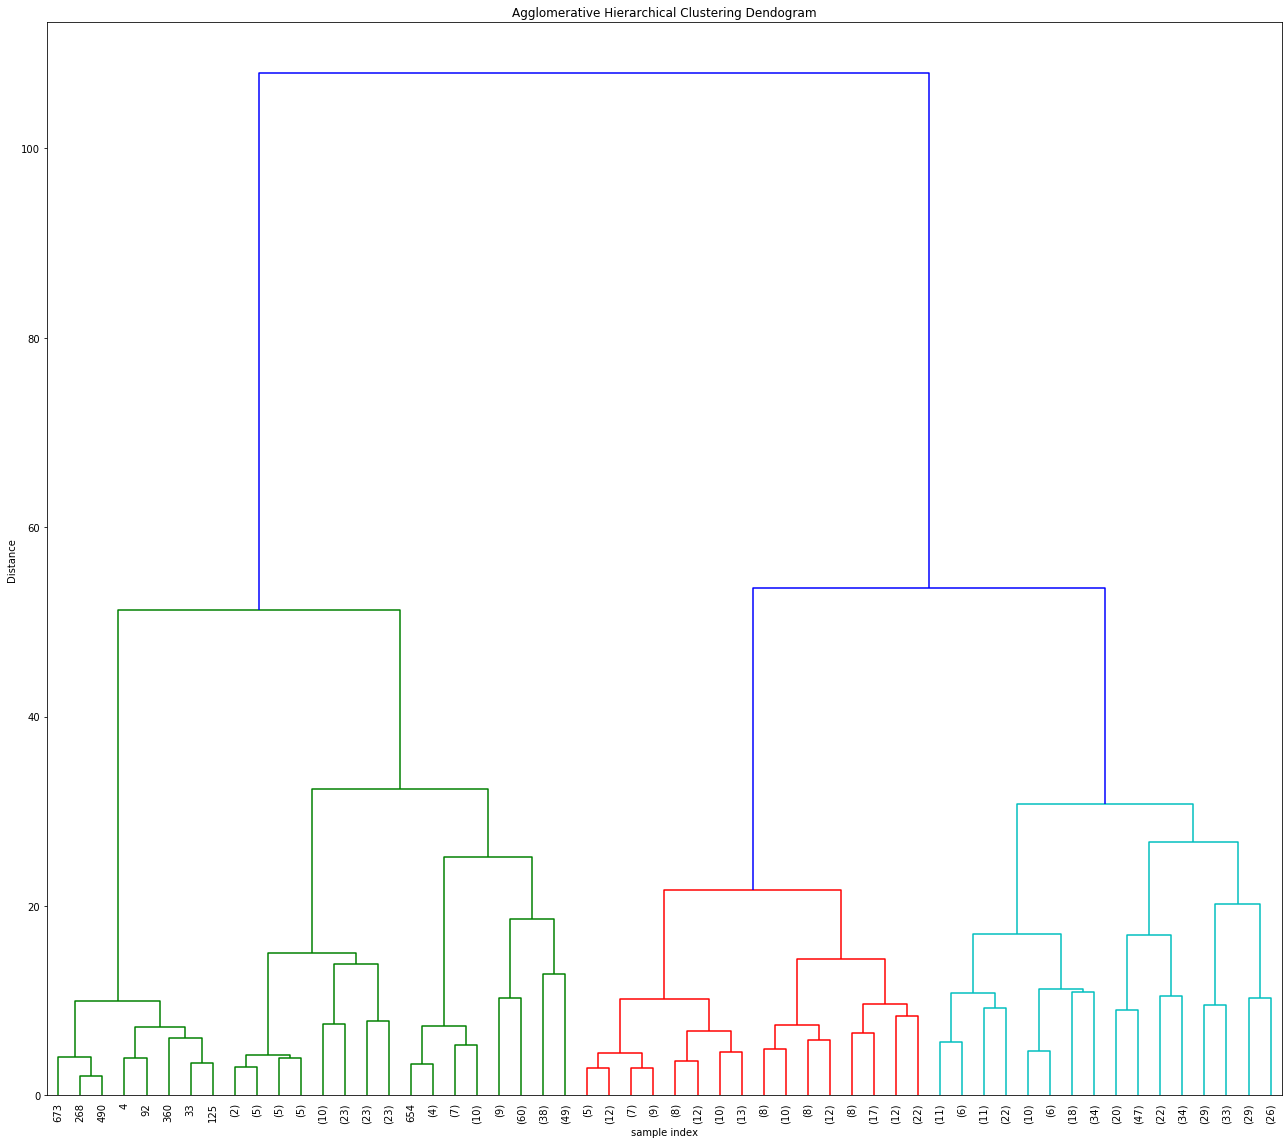

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(X_std, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=52,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()